# MTH 337: Scientific and Mathematical Computing, Spring 2017
## Merissa Lissade
### Instructor: Adam Cunningham

This course provides a broad understanding in computing in the sciences and in both abstract and applied mathematics. It is accessible to students early in their undergraduate program, thereby opening the door to the profitable use of computation throughout the junior and senior years.

The course covers the following areas:

* Programming using Python, the scientific computing package NumPy, and the plotting library Matplotlib.
* Applications of scientific computing in number theory, linear regression, dynamical systems, initial value problems, random number generation and optimization.
* Using computers to explore topics in the mathematical and natural sciences.
* Presentation of experiments, observations and conclusions in the form of written reports.

Included in this compilation of projects are all the reports done for this course:
* Report 1: Primitive Pythagorean Theorem
* Report 2: Floating Point Numbers
* Report 3: The Mayfly Model
* Report 4: Newton in the Complex Plane

# Report 1: Primitive Pythagorean Triples

## Introduction
The purpose of this report is to analyze the distribution of primitive pythagorean triples. The definition of a pythagorean triple consists of two requirements, that it must be a pythagorean triple and that it must be primitive. A pythagorean triple is a set of three numbers a, b, and c which correspond to the lengths of the sides of a right triangle. The pythagorean theorem states that for a triangle to have a right angle, the sum of the squares of the legs must equal the square of the hypotenuse. Thus:
   
$a^2 + b^2 = c^2$ (1)
   
To be considered primitive, a, b, and c must all be relatively prime to one another. For two numbers to be relatively prime, both must not be able to divide the other. To prove two numbers are relatively prime, it must be shown that the greatest common divisor of both numbers is 1. That is to say:

$gcd(a,b) = 1$ (2)

Study of primitive pythagorean triples has provided a few methods as to how to produce such sets of numbers. A method discovered first by B. Berggren proposes that to generate a primitive pythagorean triple, one can right multiply one primitive pythagorean triple represented as a column vector [a,b,c]$^T$ by the following three matrices.

A = $\begin{bmatrix} 1 & -2 & 2 \\ 2 & -1 & 2 \\ 2 & -2 & 3 \end{bmatrix}$   B = $\begin{bmatrix} 1 & 2 & 2 \\ 2 & 1 & 2 \\ 2 & 2 & 3 \end{bmatrix}$   C = $\begin{bmatrix} -1 & 2 & 2 \\ -2 & 1 & 2 \\ -2 & 2 & 3 \end{bmatrix}$

The result of this matrix multiplication is a set of three new column vectors of the same form [a,b,c]$^T$ which are also primitive pythagorean triples [1]. Therefore, for each primitive pythagorean triple, there exists three more primitive pythagorean triples related to the first by the matrices A, B, and C respectively.

## Exercise 1. Greatest Common Divisor
The Euclidean algorithim is a technique for finding the greatest common divisor (GCD) of two integers a and b. The smallest integer is subtracted from the largest integer. This is repeated until a equals b which gives us our GCD. We created a function "<font color='blue'>mygcd</font>(a,b)" that implements the Euclidean algorithim. While a does not equal b, if a is greater than b then $a=a-b$ or else if a is less than b then $b=b-a$. This then returns a as the GCD of two positive integers a and b.

In [1]:
def mygcd(a,b):
    while a != b:
        if a > b:
            a -= b
        else:
            b -= a
    return a

Here we tested our function to make sure it is working correctly. The greatest common divisor of 164 and 28 is 4

In [2]:
mygcd(164,28)

4

## Exercise 2. Perfect Squares
We created a function "<font color='blue'>is_square</font>(x)" that returns True if x is a perfect square and False otherwise. Our function returns True if x divided by its square root has a remainder of exactly zero otherwise it returns False.

In [3]:
def is_square(x):
    return x % x**0.5 == 0

We then tested out function to make sure it was working correctly. It returned True for 36 and False for 7, therefore, our function works.

In [4]:
is_square(36)

True

In [5]:
is_square(7)

False

## Exercise 3. Generate Primitive Pythagorean Triples
To generate all the Primitive Pythagorean Triples, we created three empty sets a_list, b_list, c_list. Each set will contain every a, b, and c in $a^2+b^2=c^2$. We generated and printed the first 18 Primitive Pythagorean Triples for $a,b\leq100$ to test out our code. We first set the ranges for $1<a<101$  and $a<b<101$. To prevent duplicates, b starts at a. As stated in the introduction, we must prove that a, b, and c are realtively prime to one another by showing that their GCD is 1. So if the GCD of (a,b) is 1, then $a^2+b^2=d$ and $d=c^2$. This then runs d to check if it is a perfect square using our "<font color='blue'>is_square</font>" function and also tests if the GCD of (a,c) and (b,c) is also 1. Thus, generating all the Primitive Pythagorean Triples.

In [6]:
a_list = []
b_list = []
c_list = []
for a in range(1,101):
    for b in range(a,101):
        if mygcd(a,b) == 1:
            d = a**2 + b**2
            c = d**(1/2)
            if is_square(d) and mygcd(a,c) == 1 and mygcd(b,c) == 1:
                a_list.append(a)
                b_list.append(b)
                c_list.append(c)
                print([a,b,c])

[3, 4, 5.0]
[5, 12, 13.0]
[7, 24, 25.0]
[8, 15, 17.0]
[9, 40, 41.0]
[11, 60, 61.0]
[12, 35, 37.0]
[13, 84, 85.0]
[16, 63, 65.0]
[20, 21, 29.0]
[20, 99, 101.0]
[28, 45, 53.0]
[33, 56, 65.0]
[36, 77, 85.0]
[39, 80, 89.0]
[48, 55, 73.0]
[60, 91, 109.0]
[65, 72, 97.0]


After testing our code for $a,b\leq100$, we then adjusted the code for $a,b\leq5000$ while also adding a count so that we know how many Primitive Pythagorean Triples were generated.

In [7]:
a_list = []
b_list = []
c_list = []
count = 0
for a in range(1,5001):
    for b in range(a,5001):
        if mygcd(a,b) == 1:
            d = a**2 + b**2
            c = d**(1/2)
            if is_square(d) and mygcd(a,c) == 1 and mygcd(b,c) == 1:
                count += 1
                a_list.append(a)
                b_list.append(b)
                c_list.append(c)

In [8]:
print(count)

890


## Exercise 4. Plot and Analyze Results

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt # Standard way to import plotting functions

We plotted our graph to show the Distribution of Primitive Pythagorean Triples by plotting (a,b) in red. To give a full picture we included the duplicates of (a,b) which is simply equal to (b,a) and plotted it in blue. We set the limits of our graph on the x and y axes to 5000 and labeled the axes accordingly.

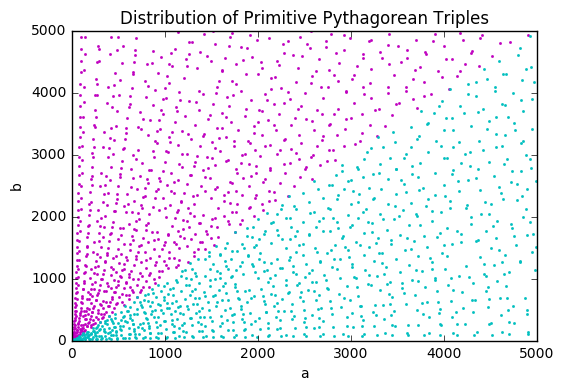

In [11]:
plt.plot(a_list, b_list, 'm.', ms = 3)
plt.plot(b_list, a_list, 'c.', ms = 3)
plt.ylim([0,5000])
plt.xlim([0,5000])
plt.title('Distribution of Primitive Pythagorean Triples')
plt.xlabel('a')
plt.ylabel('b')

## Results

The first impression that the graph of all primitive pythagorean triples with a and b being in the set of all integers from 1 to 5000 is that there is a few clear patterns. There seems to be a denser set of results situated in parabolic or circular concepts in the region, as well as straight lines

In fact, it has already been proven that there are matematical relations which govern the results shown in Figure 1. From [2], it is shown that the relations that each leg a, b and the hypotenuse c must follow are

$a = m^2 - n^2$ (3)

$b = 2mn$ (4)

$c = m^2 + n^2$ (5)

Where m and n are any integer. When equation (4) is substituted into equation (3), the following result is obtained

$a = (b^2/(4m^2)) - n^2$ (6)

This explains the parabolic patterns seen in Figure 1. The linear patterns are explained by the fact that any integer multiple of a primitive pythagorean triple is also a primitive pythagorean triple, meaning that if the [a,b,c]$^T$ is a primitive pythagorean triple, then so is k*[a,b,c]$^T$, in which k is any integer.

It should also be noted that c increases parabolically as the distance 

## References
1.  Price, H. Lee (2008). "The Pythagorean Tree: A New Species". arXiv:0809.4324
2. H. Lee Price and Frank R. Bernhart , Pythagorean Triples and a New Pythagorean Theorem, arXiv:math/0701554v2 (2007).

# Report 2: Floating Point Numbers


## Part A: Finding the Floating Point Parameters
### Introduction
The IEEE754 standard is a way that binary numbers are stored onto a computer. The standard is built on the following foundation:
* Binary numbers consists of zeros and ones that are stored as **bits**
* The number of bits on a computer and operating system will vary but will usually be either 32-bit or 64-bit
* Binary scientific notation is used to store numbers
* The **exponent** is the power of 2 and the **mantissa** is all digits after the point
* There are E bits to store the exponent and M bits to store the mantissa
* The first bit is the **sign** bit. It tells us if the number stored is positive or negative, a 0 sign bit means positive and a 1 sign bit means negative
* A fixed integer called the **bias** is added to the actual exponent before it is stored

In Part A of this report, we are trying to determine how many bits are set aside for the exponent (E) and mantissa (M), the value of the bias (B), and if denormalization is used in a 64-bit system.

### Exercise 1. Machine Epsilon
Machine epsilon ($\epsilon$) measures the space between 1 and the next number. The base 2 exponent of $\epsilon$ will tell us the amount of bits set aside for M. To find $\epsilon$, the function defined as <font color='blue'>find_epsilon</font> starts at $n=1$ and $x$ is set to be $2.0^{-n}$. While $1+x\ne1$, $1$ is added to $n$ and then repeated until it reaches 1 step before $1+x=1$. This function will then return the base 2 exponent and the actual value of $\epsilon$.

In [1]:
def find_epsilon():
    n=1
    x=2.0**(-n)
    while 1+x!=1:
        n+=1
        x=2.0**(-n)
    return 1-n, 2.0**(1-n)

In [2]:
find_epsilon()

(-52, 2.220446049250313e-16)

With these results, $M=-52$ meaning M can store up to 52 bits. This also means that in base-10 a 64-bit system can only store up to about 16 decimal places of a number. It can also be said that $E=11$ due to the logic that if there are 64 bits, 1 stores the sign bit, 52 stores the mantissa, leaving 11 bits remaining which is how many bits the exponent can store.

### Exercise 2. Largest Floating Point 
The largest floating point is the largest number that can be represented in binary on a computer and operating system.
We want to find out what the largest exponent would be when representing the largest float. The function created here <font color='blue'>find_largest</font> starts at $n=1$. While the conditions remain <font color='green'>True</font>, $x=2.0^n$ is tried, $1$ is added to $n$, and then it repeats until it breaks when $n$ is too large and prints the number before $n$ and its value.

In [3]:
def find_largest():
    n = 1
    while True:
        try:
            x = 2.0**n
            n += 1
        except:
            print(n-1, 2.0**(n-1))
            break

In [4]:
find_largest()

1023 8.98846567431158e+307


The function prints that 1023 is the largest unbiased exponent.

### Exercise 3. Smallest Floating Point
The smallest floating point is the smallest number that can be represented in binary on a computer and operating system.
We want to find out what the smallest exponent would be when representing the smallest float. The function created here <font color='blue'>find_smallest</font> is similar to the function <font color='blue'>find_epsilon</font>. <font color='blue'>find_smallest</font> starts at $n=1$ and $x$ is set to be $2.0^{-n}$. Unlike <font color='blue'>find_epsilon</font>,while $x\ne0$, $1$ is added to $n$ and then repeated until it reaches 2 steps before $x=0$. The reason for making it 2 steps before rather than 1 is because the system truncates it at $000\ldots000$<font color='red'>|</font>$1$ and rounds the last 0 up to 1 so using 2 steps instead of 1 takes into account that the cut off number. This function then returns the exponent of the smallest floating point and its value.

In [5]:
def find_smallest():
    n=1
    x=2.0**(-n)
    while x!=0:
        n+=1
        x=2.0**(-n)
    return 2-n, 2.0**(2-n)

In [6]:
find_smallest()

(-1074, 5e-324)

Now that we have the our smallest unbiased exponent, we can solve for the bias (B) by the following: $$(-1)^0\times(0.00\ldots001)\times2^{1-bias}=2^{-M}2^{1-B}=2^{1-B-M}$$
$$2^{-1074}=2^{1-B-52}$$
$$-1074=-B-51$$
$$B=-51+1074$$
$$B=1023$$

### Exercise 4. Inferring Floating-Point Parameters
| Number | Sign | Exponent | Mantissa | Value |
|---------------------------------------------|
| Biggest float | 0 | $1023+B$ | 111$\ldots$111 | $2^{1023+B}$=$2^{2046}$ |
| $1+\epsilon$ | 0 | $B$|000$\ldots$000 | $1+$$2^{-52}$ |
| Smallest normalized | 0 | 000$\ldots$001 | 000$\ldots$000 | $2^{1-B}$=$2^{-1022}$ |
| "First" denormalized | 0 | 000$\ldots$000 | 100$\ldots$000 | $2^{-B}$ |
| Smallest float | 0 | 000$\ldots$000 | 000$\ldots$001 | $2^{-1074}$ |


### Part A Results
One thing to notice, after solving the largest and smallest exponent, we can deduce that the range of exponents is 2097

For the Biggest float: the sign bit will be 0 indicating that it is a positive number, the exponent will be $1023+B$ the mantissa consists of all 1's and the value is $2^{2046}$. 2046 is the largest biased exponent.

For $1+\epsilon$: the sign bit will be 0 indicating that it is a positive number, the exponent is the bias. The mantissa consists of all 0s and its value is $1+2^{-52}$

For Smallest normalized: the sign bit will be 0 indicating that it is a positive number, the exponenet 000$\ldots$001 the mantissa consists of all 0s and its value is $2^{-1022}$

For "First" denormalized: the sign bit will be 0 indicating that it is a positive number, the exponenet consists of all 0s the mantissa is 100$\ldots$000 and its value is $2^{-1023}$

For the smallest float: the sign bit will be 0 indicating that it is a positive number, the exponenet consists of all 0s the mantissa is 100$\ldots$001 and its value is $2^{-1074}$

## Part B: Extending the Taylor Series Approximation
### Introduction
This is the Taylor series approximation to a function f(x), specialized to expansion at zero
$$f(x)=f(0)+f'(0)x+\frac{f''(0)}{2!}x^2+\frac{f'''(0)}{3!}x^3+\ldots+\frac{f^{n}(0)}{n!}x^n+\frac{f^{n+1}(\xi)}{(n+1)!}x^{n+1}$$
where $0\leqslant\xi\leqslant x$

### Exercise 5. Plot f(x)=log(1 + x)/x
matplotlib.pyplot and numpy are imported in

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

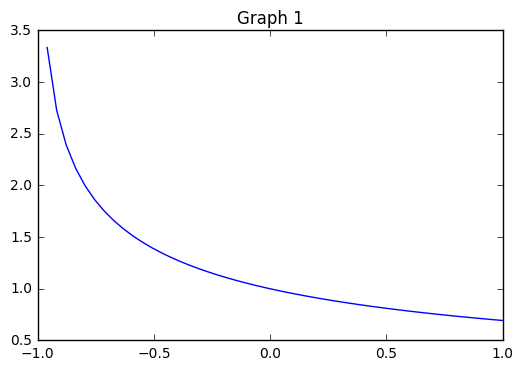

In [8]:
end = 1
x = np.linspace(-end,end)
y = np.where(x==0, 1.0, np.log(1+x)/x)
plt.plot(x, y)
plt.title("Graph 1");

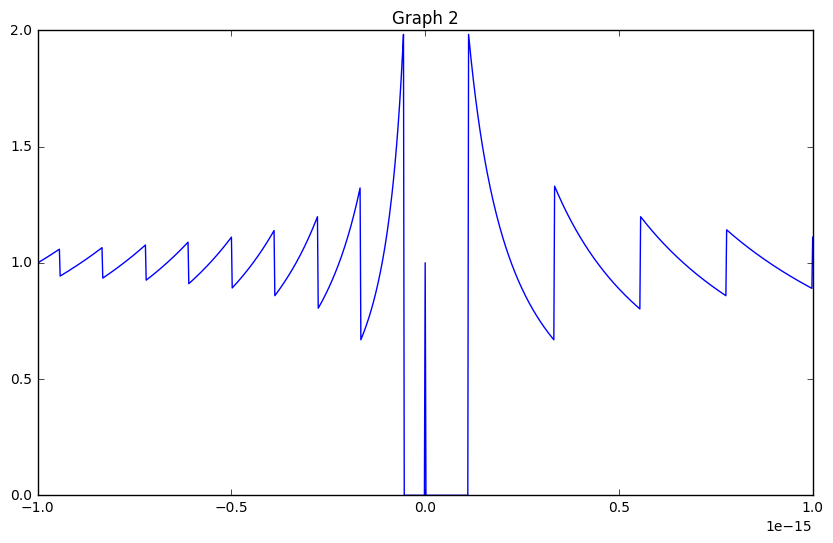

In [9]:
plt.figure(figsize=(10, 6))
end = 1e-15
x = np.linspace(-end, end, 1001)
y = np.where(x==0, 1.0, np.log(1+x)/x)
plt.plot(x, y)
plt.title("Graph 2");

### Exercise 6. Extend Taylor Series
$$f(x)=log(1+x)=x-\frac{x^2}{2}+\frac{x^3}{3}-\frac{x^4}{4}+R_5$$
<center>where</center>
$$R_5=\frac{x^5}{5(1+\xi)^5}$$
***
$$g(x)=log\frac{(1+x)}{x}=1-\frac{x}{2}+\frac{x^2}{3}-\frac{x^3}{4}+Q_5$$
<center>where</center>
$$Q_5=\frac{x^4}{5(1+\xi)^5}$$

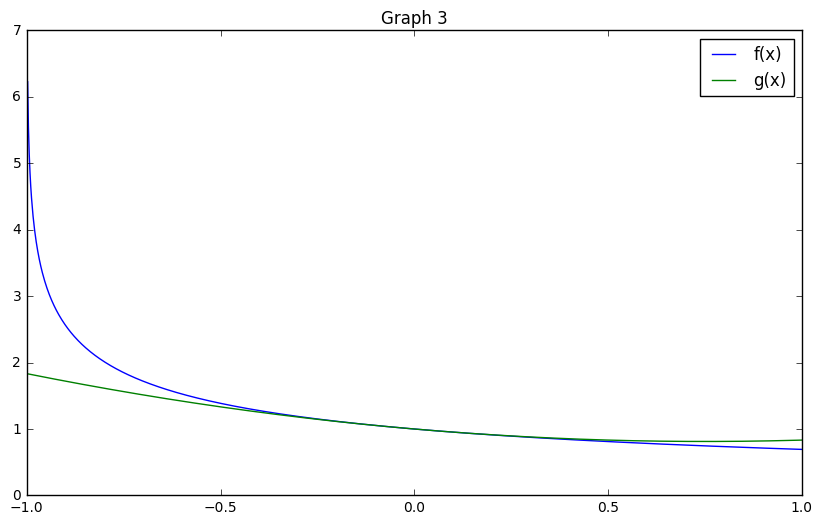

In [10]:
plt.figure(figsize=(10, 6))
end = 1
x = np.linspace(-end, end, 1001)
y = np.where(x==0, 1.0, np.log(1+x)/x)
g = 1 - x/2 + x**2/3
plt.plot(x, y, label='f(x)')
plt.plot(x, g, label='g(x)')
plt.legend()
plt.title("Graph 3");

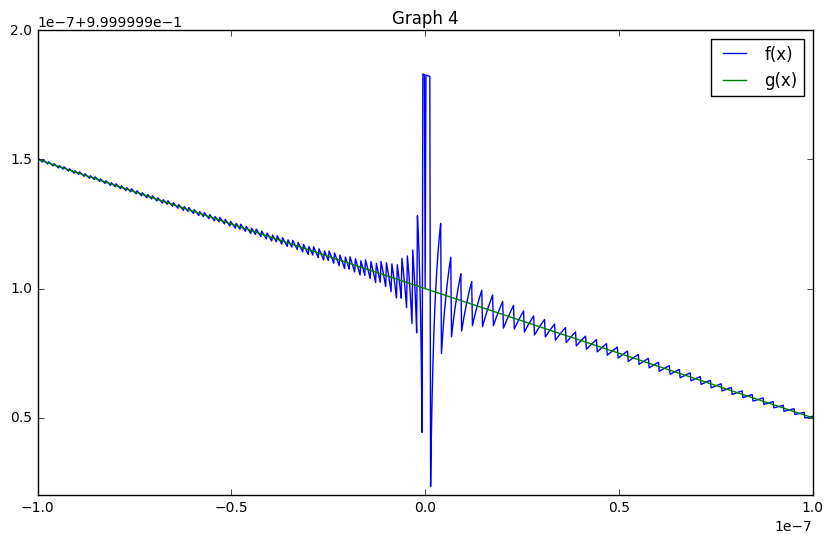

In [11]:
plt.figure(figsize=(10, 6))
end = 1e-7
x = np.linspace(-end, end, 1001)
y = np.where(x==0, 1.0, np.log(1+x)/x)
g = 1 - x/2 + x**2/3
plt.plot(x, y, label='f(x)')
plt.plot(x, g, label='g(x)')
plt.legend()
plt.title("Graph 4");

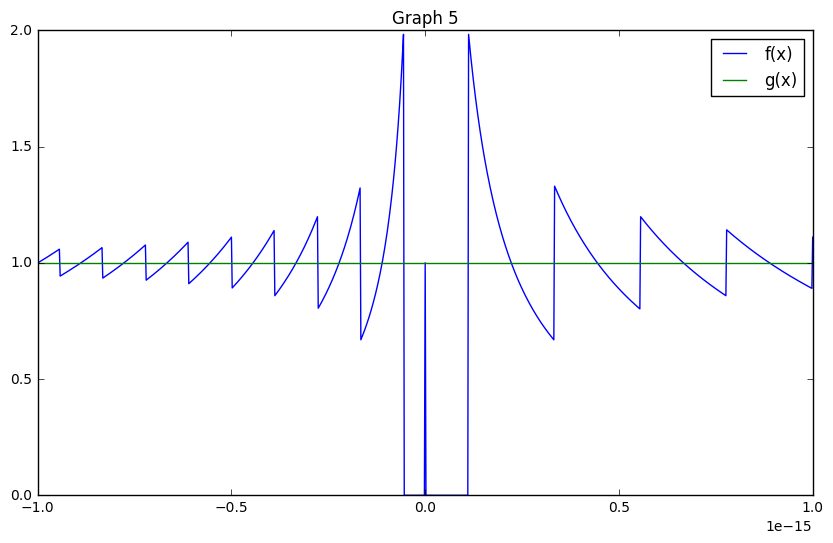

In [12]:
plt.figure(figsize=(10, 6))
end = 1e-15
x = np.linspace(-end, end, 1001)
y = np.where(x==0, 1.0, np.log(1+x)/x)
g = 1 - x/2 + x**2/3
plt.plot(x, y, label='f(x)')
plt.plot(x, g, label='g(x)')
plt.legend()
plt.title("Graph 5");

### Exercise 7. Approximation Error
For $0\leqslant\xi\leqslant x$, the minimum value of $1+\xi$ is when $\xi=0$. So:
$$|Q_5| \leqslant |\frac{x^4}{5}| \leqslant |10^{-16}|$$
$$\frac{x^4}{5} \leqslant 10^{-16}$$
$$x^4 \leqslant 5\times 10^{-16}$$
$$x \leqslant (5\times 10^{-16})^{1/4}\approx 1.4953\times 10^{-4}$$


### Part B Results
Graph 1 is what $f(x)=log\frac{1+x}{x}$ looks like. When it's zoomed in near 0 you can begin to see the error at zero(graph 2). The approximation is $g(x)$ can be seen in graph 3 that at 0 the approximation visually looks almost exact. The more terms added the more exact the approximation becomes. Graph 4 and 5 shows this more closely how the approximation goes straight through $f(x)$.

# Report 3: The Mayfly Model

## Introduction
In this report, we use the **Mayfly Model** to see how in a certain year, $t$, a mayfly population, $x_t$ in the interval $[0,1]$, depends on the population of the year before. Each year the mayflies emerge, mate, lay eggs, and die all over the course of a few days. The growth rate is measured by a parameter $b$. This is made with the assumption that in the right conditions there is a number of surviving offspring per adult member of the population. As population densities increase, resources begin to deplete, mayflies become more vulnerable to disease, predators, environmental fluctuations. This causes a reduction in the number of surviving offspring for the next year, $x_{t+1}$. Taking all of these factors into account the population for the next year follow this model: $$x_{t+1}=bx_{t}(1-x_{t})$$

## Part A: The Mayfly Model
For this part of the report, the Mayfly Model is run under a range of different conditions. The questions we are trying to answer here are: what kind of patterns does the system $x_{t+1}=bx_{t}(1-x_{t})$ display and how is it dependent on the parameter $b$? Two of the main focuses of this part is the different kinds of short-term (transient) and long-term (asymptotic) patterns that occur.

### Exercise 1. Displaying the Transient Behavior
In this exercise, different values for $b$ are used to run the mayfly model. To do so, first we need to test if the model works. From the created funtion <font,color=blue>mayfly</font>, $x$ is printed  for every year up to $t$ with a fixed $b$ value to test if the model works.

In [1]:
def mayfly(x,b,t):
    for i in range(t):
        x=b*x*(1-x)
        print(x)

In [2]:
mayfly(.5,3,5)

0.75
0.5625
0.73828125
0.5796661376953125
0.7309599195141345


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now that we see the Mayfly Model works, we create a function <font,color=blue>plot_mayfly</font> so that we can plot the populations $x$ against $t$ years for several values of $b$.

In [4]:
def plot_mayfly(x,b,t):
    time = np.arange(t)
    pop = [x]
    for i in range(1,t):
        x = x*b*(1-x)
        pop.append(x)
    return time, pop

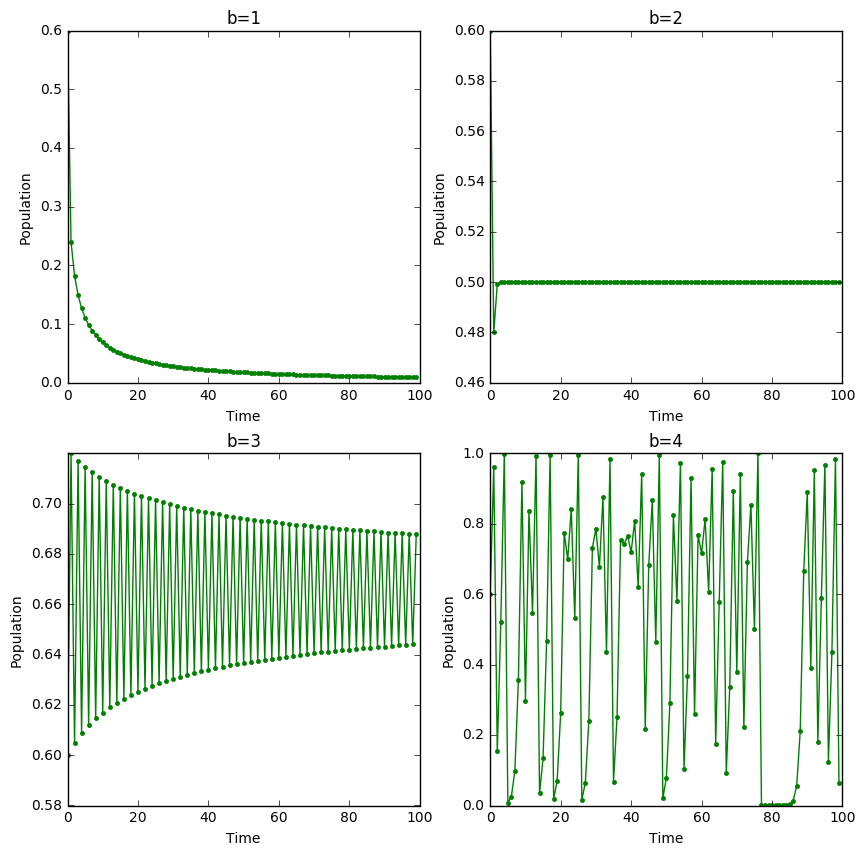

In [5]:
plt.figure(figsize=(10,10))
for b in range(1,5):
    plt.subplot(2,2,b)
    t,x = plot_mayfly(0.6,b,100)
    plt.plot(t,x,'g.-')
    plt.title('b={}'.format(b))
    plt.xlabel('Time')
    plt.ylabel('Population')

#### Observations

$b=1$ :
The population seems to exponentially converge to zero over time.

$b=2$ :
The population flatlines almost immediately and remains constant at $x\approx0.50$

$b=3$ :
The population seems to oscillate between $x=0.60$ and $x=0.72$

$b=4$ :
There seems to be no exact pattern of the population

Based off of these observations, hypothetically somewhere betweeen $b=2$ and $b=3$ there may be a value that will show the population oscillating until it converges to a single value.

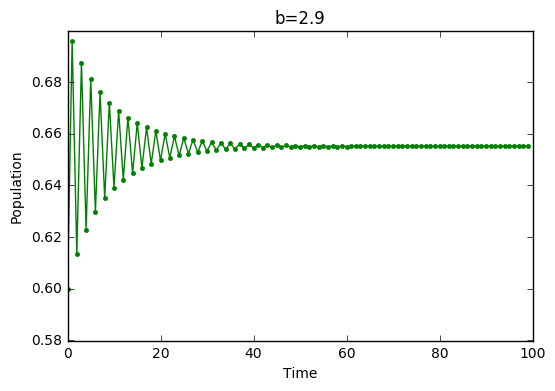

In [6]:
t,x = plot_mayfly(.6,2.9,100)
plt.plot(t,x,'g.-')
plt.title('b=2.9')
plt.xlabel('Time')
plt.ylabel('Population');

For this graph, I chose b=2.9 to prove that the hypothetical statement is true.

### Exercise 2. Displaying the Asymptotic Behavior
For this exercise, we are trying to create a picture of values that show the population when it converges asymptotically for a a large number of b values in the interval [0,4]. To create this picture we define a function <font,color=blue>plot_mayfly2</font>. In this function, we create 500 values for $b$ between 0 and 4

In [7]:
def plot_mayfly2(x,b,tmax):
    for t in range(tmax):
        x=b*x*(1-x)
        if t>500:
            plt.plot(b,x,'c.',ms=0.5,alpha=0.25)
    plt.xlabel('b')
    plt.ylabel('x')

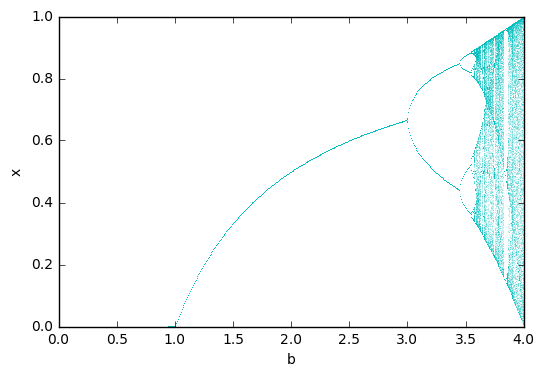

In [8]:
plot_mayfly2(.6, np.linspace(0,4,500), 1000)

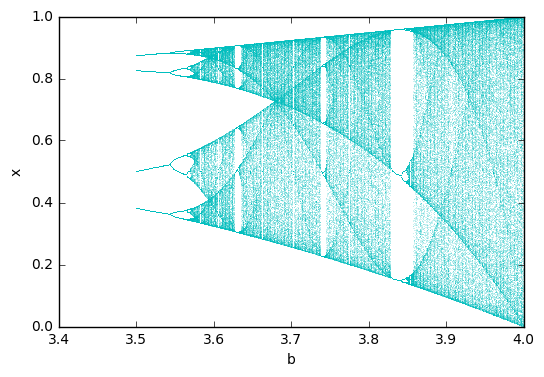

In [9]:
plot_mayfly2(.6, np.linspace(3.5,4,500), 1000)

#### Observations
From about b=1.0 to about b=3.0, for every value of b there is one value of x. After b=3.0, x begins to separate and it becomes complex. It can also be see again that these values of x continuously split and become a bit chaotic. In some places there is a dense amount of points other areas there is nothing. This kind of behavior seems to coincide with what is seen the code cell [5] where after b=3, you no longer see any kind of pattern.

## Part B: The Butterfly Effect

### Exercise 3. Separation of Trajectories
To see if the mayfly model exhibits a *butterfly effect*, we graph the separation of nearby trajectories, $m$ and $n$ on a logarithmic scale using semilogy to plot $log(s_t)$ against t. So we create a function <font,color=blue>plot_mayfly3</font> that returns $t$ and $s$ as arrays. When selectiong a value of $m$ and $n$ we make sure they are only a very small difference from each other. $m$ and $n$ then becomse $s=|m-n|$

In [10]:
def butterfly(m,b,t):
    time = np.arange(t)
    eps = 1e-8
    n = m + eps
    s = [eps]
    for i in range (1,t):
        m = m*b*(1-m)
        n = n*b*(1-n)
        s.append(abs(m-n))
    return time,np.array(s)

Here we test the code to see if it works using $m=0.6$, $b=2.9$, and $t=10$.

In [11]:
butterfly(0.6,2.9,10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([  1.00000000e-08,   5.80000037e-09,   6.59344035e-09,
          4.34404135e-09,   4.72615636e-09,   3.37054451e-09,
          3.54141605e-09,   2.66675515e-09,   2.72403922e-09,
          2.13370832e-09]))

Now that we see it works we put the function into action using the $b$ values of $b=1.5$, $b=2$, $b=3$, and $b=4$

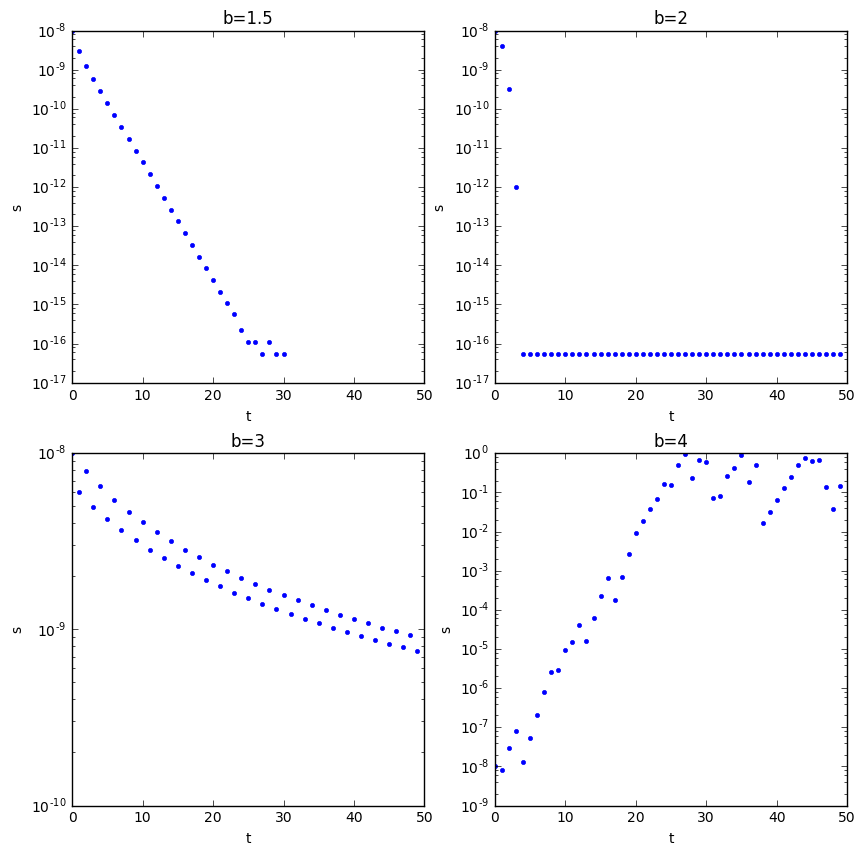

In [12]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
b = 1.5
t,s = butterfly(0.6,b,50)
plt.semilogy(t,s,'b.')
plt.title('b={}'.format(b))
plt.xlabel('t')
plt.ylabel('s')

for b in range(2,5):
    plt.subplot(2,2,b)
    t,s = butterfly(0.6,b,50)
    plt.semilogy(t,s,'b.')
    plt.title('b={}'.format(b))
    plt.xlabel('t')
    plt.ylabel('s') ;

### Exercise 4. Linear Least Squares
In this exercise, we are trying to use the linear least squares formula to comput the slope of the best-fit line. 
$$w_0+w_{1}\bar{x}=\bar{y}$$

$$w_0\bar{x}+w_{1}\bar{x}^2=\bar{xy}$$

$$\begin{bmatrix} 1 & \bar{x} \\ \bar{x} & \bar{x}^2 \end{bmatrix} \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} = \begin{bmatrix} \bar{y} \\ \bar{xy} \end{bmatrix}$$

$$A = \begin{bmatrix} 1 & \bar{x} \\ \bar{x} & \bar{x}^2 \end{bmatrix}$$
$$b = \begin{bmatrix} \bar{y} \\ \bar{xy} \end{bmatrix}$$

We define a function <font,color=blue>linearleastsquares</font> to implement this formula and return $w = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} $

In [13]:
def linearleastsquares(x,y):
    xmean = np.mean(x)
    x2mean = np.mean(x**2)
    ymean = np.mean(y)
    xymean = np.mean(x*y)
    A = np.array([[1,xmean],[xmean,x2mean]])
    b = np.array([ymean,xymean])
    w = np.linalg.solve(A,b)
    return w

The code is then tested to see if this function does work.

In [14]:
for b in range(1,5):
    x,y = butterfly(0.6,b,30)
    w0,w1 = linearleastsquares(x,y)
    print(w0,w1)

1.86582504328e-09 -9.10061947273e-11
1.78712092073e-09 -9.03278205014e-11
6.3524061923e-09 -2.03817582756e-10
-0.130475445334 0.0154620475339


Now that the function works. I copied and pasted the code from before adding $y=log(s)$, $x=t$, between $t=1$ and $t=30$ and setting the two outputs of $w$ equal to $w0$ and $w1$. I the create $r=w0+w1*t$ which leaves the plotting of the fit line last. Using semilogy again, we plot $e^r$ against $t$

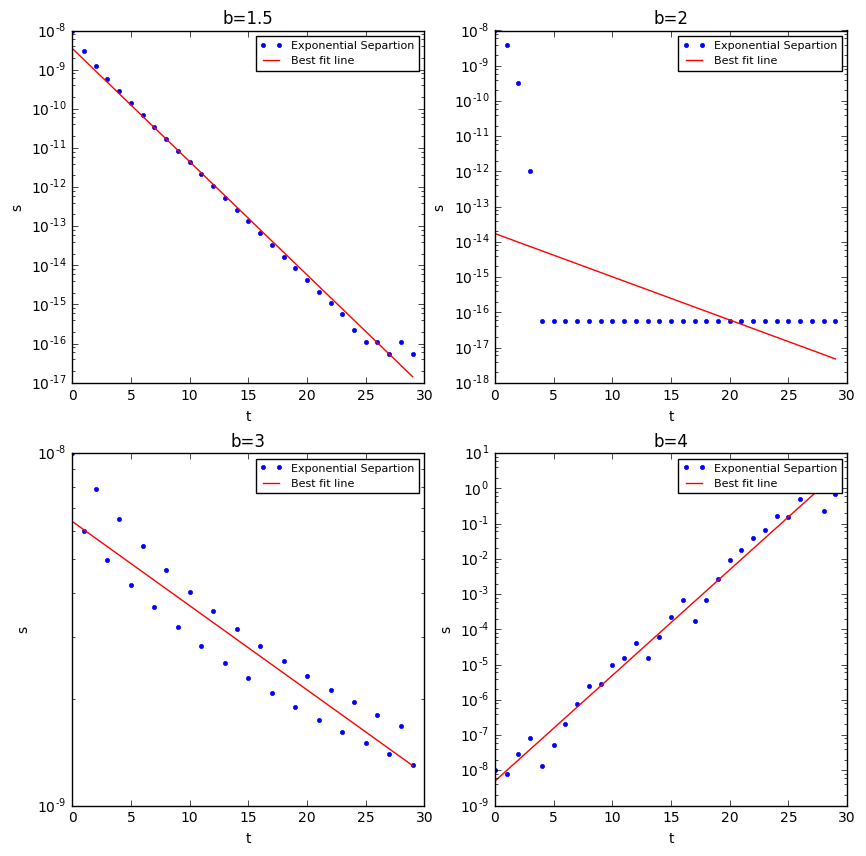

In [15]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
b = 1.5
t,s = butterfly(0.6,b,30)
y = np.log(s[1:30])
x = t[1:30]
w0, w1 = linearleastsquares(x,y)
r = w0 + w1 * t
plt.semilogy(t,s,'b.',label='Exponential Separtion')
plt.semilogy(t,np.exp(r),'-r',label='Best fit line')
plt.title('b={}'.format(b))
plt.xlabel('t')
plt.ylabel('s')
plt.legend(fontsize=8)

for b in range(2,5):
    plt.subplot(2,2,b)
    t,s = butterfly(0.6,b,30)
    y = np.log(s[1:30])
    x = t[1:30]
    w0, w1 = linearleastsquares(x,y)
    r = w0 + w1 * t
    plt.semilogy(t,s,'b.',label='Exponential Separtion')
    plt.semilogy(t,np.exp(r),'-r',label='Best fit line')
    plt.title('b={}'.format(b))
    plt.xlabel('t')
    plt.ylabel('s')
    plt.legend(fontsize=8);

# Report 4: Newton in the Complex Plane

## Introduction
This report focuses on exploring how points in the complex plane converge to the "cube roots of unity" under Newton's method.

**The Cube Roots of Unity:** are complex numbers $z$ such that $z^3=1$. In the complex plane there are 3 roots total, 1 and two complex roots.

**Newton's Method:** Assuming $f$ is diffentiable and values are availe for both $f$ and $f'$, let $x_i$ be the initial estimate of the root. At $x_i$ the tangent to $f(x)$ is found then let $x_{i+1}$ be the intersection of the tangent with the x-axis such that:
$$x_{i+1}=x_i-\frac{f(x_i)}{f'(x_i)}$$
Accuracy doubles at each step.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Exercise 1. Apply Newton's Method in the Complex Plane
In this exercise, a rectangular region of the complex plane is chosen that would include the origin. The region chosen has a real part (x) from -1.5 to 1.5 and an imaginary part (y) from -1.5j to 1.5j. Using Newton's Method applied to the equation $f(z)=z^3-1$, the three different "cube roots of unity" points are found in this region to converge to. After that the roots are turned into boolean arrays.

In [2]:
roots = np.array([complex(np.cos(2*np.pi*i/3), np.sin(2*np.pi*i/3)) for i in range(3)])
print(roots)

[ 1.0+0.j        -0.5+0.8660254j -0.5-0.8660254j]


In [3]:
npts = 500
x = np.linspace(-1.5, 1.5, npts)
y = np.linspace(-1.5j, 1.5j, npts)
X,Y = np.meshgrid(x,y)
Z = X + Y

niters = 50
for i in range(niters):
    Z -= (Z**3 - 1)/(3*Z**2)
print(Z)

[[-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]
 [-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]
 [-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]
 ..., 
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]]


In [4]:
tol = 0.01
root1 = np.abs(Z - roots[0]) < tol
root2 = np.abs(Z - roots[1]) < tol
root3 = np.abs(Z - roots[2]) < tol
print(root1)

[[False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 ..., 
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]]


## Exercise 2. Display the Basins of Attraction
In this exercise, all the steps from Exercise 1 are taken and used to create a function <font,color=blue>newton</font> that will generate a high-resolution image that colors the points in the region from Exercise 1 according to which root they coverge to. The function takes in a desired number of point (npts), a desired number of iteration (niters), a tolerance (tol), and a region in the complex plane, a real part (x1,x2) and an imaginary part (y1,y2) as its parameters. Included at the end of the funcion is the method in which will color each point according to the root it converges to. A yellow **<font,color=yellow>color</font>** for root1, magenta **<font,color=magenta>color</font>** for root2 and cyan **<font,color=cyan>color</font>** for root3.

In [5]:
def newton(npts,niters,tol, x1, x2, y1, y2):
    
    roots = np.array([complex(np.cos(2*np.pi*i/3), np.sin(2*np.pi*i/3)) for i in range(3)])
    x = np.linspace(x1, x2, npts)
    y = np.linspace(y1, y2, npts)
    X,Y = np.meshgrid(x,y)
    Z = X + Y
    for i in range(niters):
        Z -= (Z**3 - 1)/(3*Z**2)

    root1 = np.abs(Z - roots[0]) < tol
    root2 = np.abs(Z - roots[1]) < tol
    root3 = np.abs(Z - roots[2]) < tol

    img = np.zeros((npts, npts, 3))
    img[root1] = [1, 1, 0]
    img[root2] = [1, 0, 1]
    img[root3] = [0, 1, 1]
    plt.figure(figsize = (10,10))
    plt.imshow(img, interpolation='none')
    plt.xlabel('x = Re z')
    plt.ylabel('y = Im z');

The function is then used to produce an image with the following parameters:
* npts = 500
* niters = 50
* tol = 0.01
* x1 = -1.5
* x2 = 1.5
* y1 = -1.5j
* y2 = 1.5j

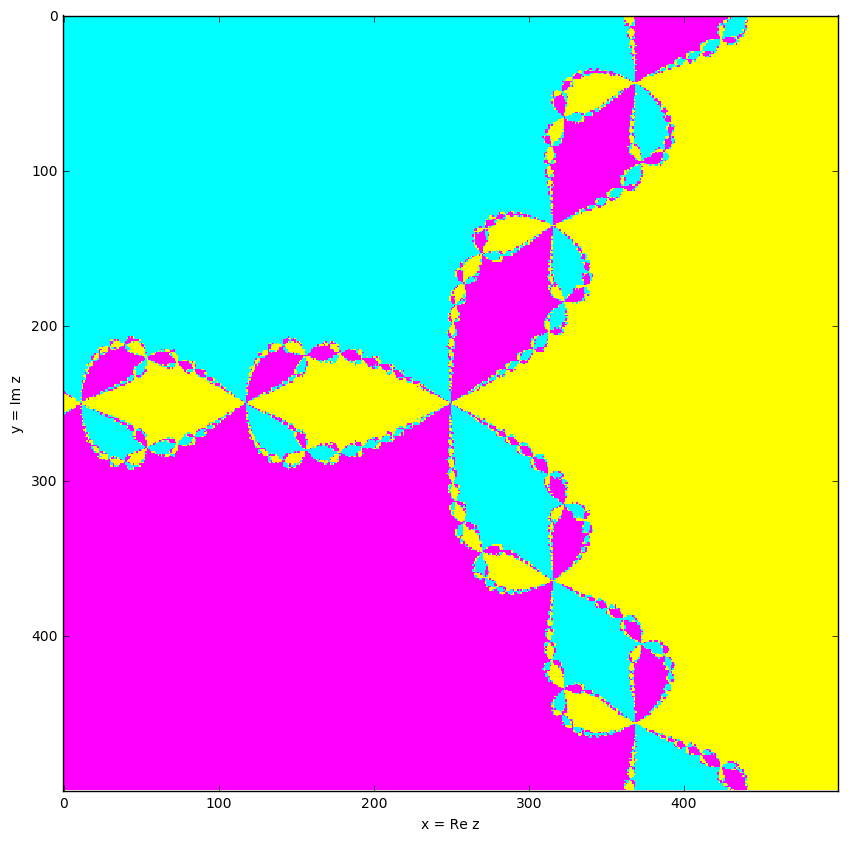

In [6]:
newton(500,50,0.01, -1.5,1.5, -1.5j,1.5j)

In the image there seems to be some kind of unique pattern of smaller polar rose curves that chain together to form bigger rose curves of the formula
<center> $r=a\cos(3\theta)$ or alternatively $r=a\sin(3\theta)$ </center>

This image shows that the cube roots of unity are equally spacded from each other.

## Exercise 3. Zoom in on the Complex Plane
In this exercise, the function created from Exercise 2 is used again but this time to create a zoomed in picture on a portion of the plane. To do this different parameters are used.
* npts = 500
* niters = 50
* tol = 0.01
* x1 = -0.05
* x2 = 0.15
* y1 = 0.3j
* y2 = 0.5j

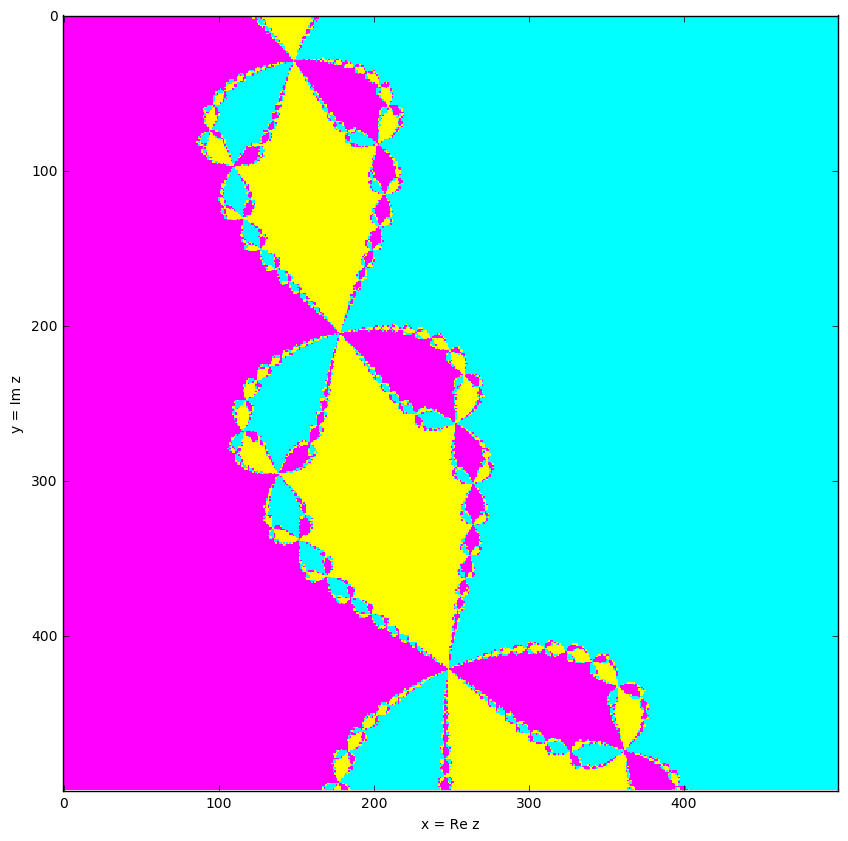

In [7]:
newton(500,50,0.01, -0.05,0.15, 0.3j,0.5j)

With the zoomed in image you can really see how smaller polar rose curves form chains of other rose curves to create a larger rose curve. 

## Exercise 4. Display the Number of Iterations
This exercise is very similar to that of Exercise 2, except now, using brightness of the colors, an image is to be generated to represent the number of iterations needed by Newton's method to converge a root.
So to accomplish this a function <font,color=blue>newton_iters</font> is created that will generate a high-resolution image that colors the points in the region from Exercise 1 according to which root they coverge to and will make an area brighter if it takes more iterations to converge to a root. Like before, the function takes in a desired number of point (npts), a desired number of iteration (niters), a tolerance (tol), and a region in the complex plane, a real part (x1,x2) and an imaginary part (y1,y2) as its parameters.

In [8]:
def newton_iters(npts,niters,tol, x1,x2, y1,y2):
    roots = np.array([complex(np.cos(2*np.pi*i/3), np.sin(2*np.pi*i/3)) for i in range(3)])
    x = np.linspace(x1, x2, npts)
    y = np.linspace(y1, y2, npts)
    X,Y = np.meshgrid(x,y)
    Z = X + Y

    a = np.zeros((npts,npts))
    for i in range(niters):
        Z -= (Z**3 - 1)/(3*Z**2)
        for n in range(3):
            a += np.abs(Z - roots[n]) < tol
    a /= niters

    root1 = np.abs(Z - roots[0]) < tol
    root2 = np.abs(Z - roots[1]) < tol
    root3 = np.abs(Z - roots[2]) < tol
    img = np.zeros((npts, npts, 4))
    img[root1] = [1, 1, 0, 0]
    img[root2] = [1, 0, 1, 0]
    img[root3] = [0, 1, 1, 0]
    img[:,:,3] = a
    plt.figure(figsize = (10,10))
    plt.imshow(img, interpolation='none')
    plt.xlabel('x = Re z')
    plt.ylabel('y = Im z');

The function is then used to produce the same image from Exercise 2 but with the added feature using the following parameters:
* npts = 500
* niters = 30
* tol = 0.01
* x1 = -1.5
* x2 = 1.5
* y1 = -1.5j
* y2 = 1.5j

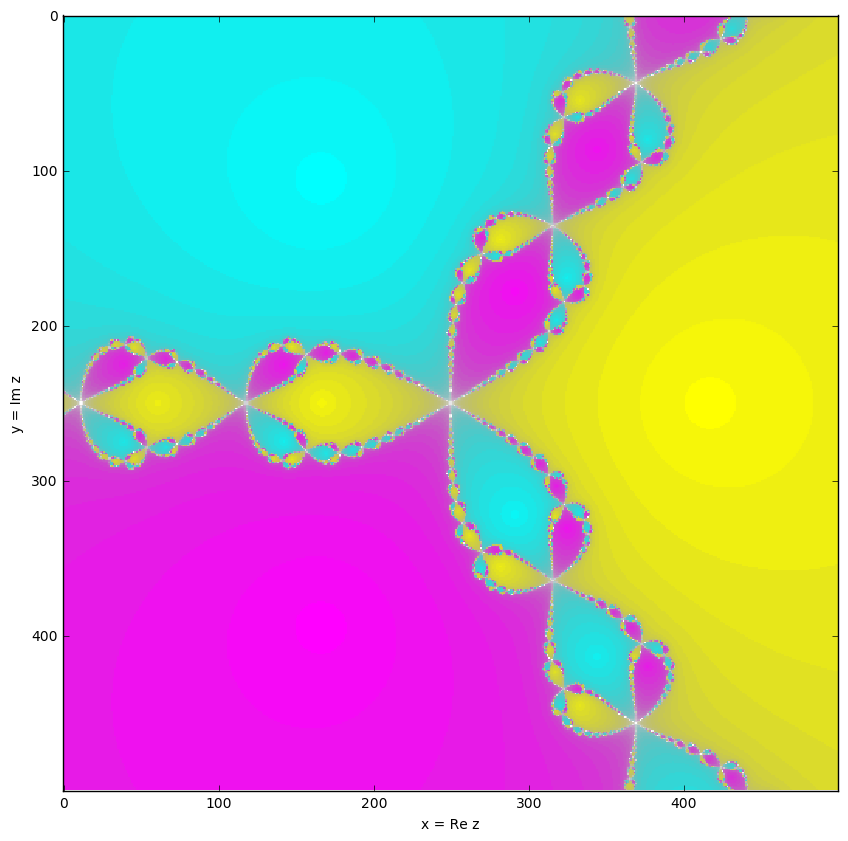

In [9]:
newton_iters(500,30,0.01, -1.5,1.5, -1.5j,1.5j)

It is seen that in center of these rose curves is where they are brightest and as you move away from the center it gets darker. This means towards the center of these rose curves is where more iterations are needed so that the point converges to the root but as you move away from that point the number of iterations needed become less.

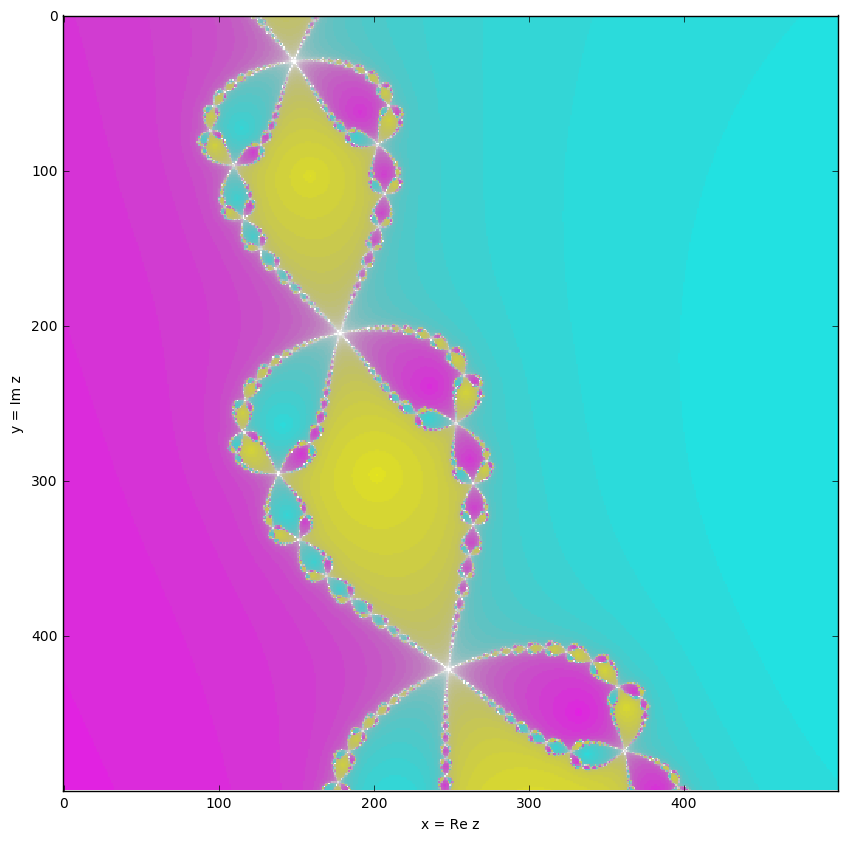

In [10]:
newton_iters(500,30,0.01, -0.05,0.15, 0.3j,0.5j)

Similarly to Exercise 3, I zoomed in on the same region and used to function <font,color=blue>newton_iters</font> to add the different brightness of colors and it follows the same pattern as said before.